In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
pd_data = pd.read_csv(url, header=None)
np_data = pd_data.to_numpy()

print(np_data[:5,:], np_data.shape)

[['M' 0.455 0.365 0.095 0.514 0.2245 0.101 0.15 15]
 ['M' 0.35 0.265 0.09 0.2255 0.0995 0.0485 0.07 7]
 ['F' 0.53 0.42 0.135 0.677 0.2565 0.1415 0.21 9]
 ['M' 0.44 0.365 0.125 0.516 0.2155 0.114 0.155 10]
 ['I' 0.33 0.255 0.08 0.205 0.0895 0.0395 0.055 7]] (4177, 9)


### UCI ABALONE
- Sex가 M인 샘플 기준
   * length와 height의 회귀선을 긋고, SSE값 구해보기
   
- Sex가 F인 샘플 기준
   * Whole weight 대비, Shucked weight, Vicera weight, Shell weight의 각 % 구성비 구하기
   * Male에 대한 구성비
   * Female, Male 간 각 구성비 (%)의 mean값에 차이가 있는지 확인

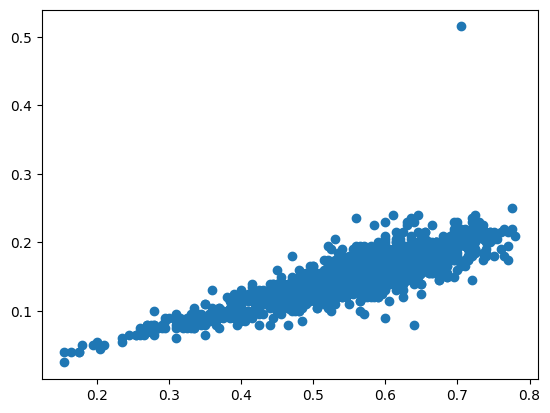

In [2]:
# Sex가 M인 샘플 기준
# length와 height의 회귀선을 긋고, SSE값 구해보기
filter1 = np_data[:,0] == 'M'
# print(filter1, filter1.shape)

sub_data = np_data[:,[1,3]][filter1].astype(np.float64)
xs = sub_data[:,0]
ys = sub_data[:,1]

# _, axe = plt.subplots()
# axe.scatter(sub_data[:,0], sub_data[:,1])


_, axe = plt.subplots()
axe.scatter(xs, ys)

0.28217804178098105 -0.007031240268281724


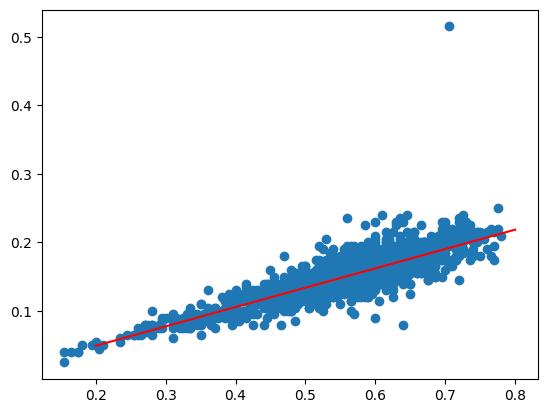

In [3]:
# y = ax + b
# a = (x와 y의 상관관계 계수) * (y std_dev / x std_dev)
# b = mean_y - (a * mean_x)

# x와 y의 상관관계 계수
corr = np.corrcoef(xs, ys)[0,1]

std_x = np.std(xs)
std_y = np.std(ys)
mean_x = np.mean(xs)
mean_y = np.mean(ys)
# print(std_x, std_y, mean_x, mean_y)

a = corr * (std_y/std_x)
b = mean_y - (a*mean_x)
print(a,b)

_, axe = plt.subplots()
axe.scatter(xs,ys)

# 회귀선
axe.plot(np.linspace(0.2, 0.8, 100), a*np.linspace(0.2, 0.8, 100)+b, color='red')

In [4]:
ys_pred = a*xs+b

err = ys_pred - ys
# print(err)

print("sse :", np.sum(err**2))

sse : 0.5673949700538785


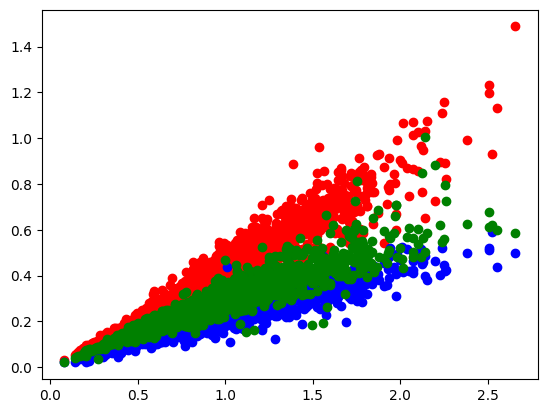

In [5]:
# Sex가 F인 샘플 기준
# Whole weight 대비, Shucked weight, Vicera weight, Shell weight의 각 % 구성비 구하기
filter2 = np_data[:,0] == 'F'
# print(filter2, filter2.shape)

whole_w = np_data[:,4][filter2]
shucked_w = np_data[:,5][filter2]
vicera_w = np_data[:,6][filter2]
shell_w = np_data[:,7][filter2]

_, axe = plt.subplots()
axe.scatter(whole_w, shucked_w, color="red")

# _, axe = plt.subplots()
axe.scatter(whole_w, vicera_w, color="blue")

# _, axe = plt.subplots()
axe.scatter(whole_w, shell_w, color="green")

In [6]:
shucked_per = shucked_w/whole_w*100
shucked_total_per = shucked_w.sum()/whole_w.sum()*100
vicera_per = vicera_w/whole_w*100
vicera_total_per = vicera_w.sum()/whole_w.sum()*100
shell_per = shell_w/whole_w*100
shell_total_per = shell_w.sum()/whole_w.sum()*100

print(shucked_per)
print(shucked_total_per)
print(vicera_per)
print(vicera_total_per)
print(shell_per)
print(shell_total_per)

f_shucked_mean = np.mean(shucked_per)
f_vicera_mean = np.mean(vicera_per)
f_shell_mean = np.mean(shell_per)

print(f_shucked_mean, f_vicera_mean, f_shell_mean)

[37.887740029542094 30.482315112540192 38.28124999999999 ...
 46.58536585365853 41.713641488162345 48.5153037916857]
42.634890985091204
[20.90103397341211 18.19935691318328 19.466145833333332 ... 20.0
 26.944757609921083 23.84650525354043]
22.043145375753678
[31.0192023633678 42.44372990353698 33.85416666666667 ...
 28.69918699186992 28.07215332581736 27.044312471448144]
28.8581627300426
42.32978625715371 22.136504174282255 29.247267809564086


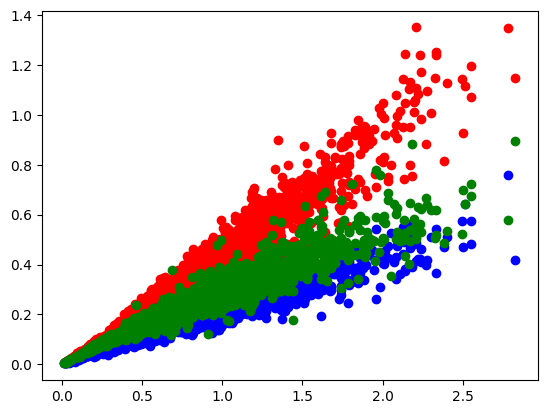

In [7]:
# Sex가 M인 샘플 기준
# Whole weight 대비, Shucked weight, Vicera weight, Shell weight의 각 % 구성비 구하기
filter3 = np_data[:,0] == 'M'
# print(filter2, filter2.shape)

whole_w = np_data[:,4][filter3]
shucked_w = np_data[:,5][filter3]
vicera_w = np_data[:,6][filter3]
shell_w = np_data[:,7][filter3]

_, axe = plt.subplots()
axe.scatter(whole_w, shucked_w, color="red")

# _, axe = plt.subplots()
axe.scatter(whole_w, vicera_w, color="blue")

# _, axe = plt.subplots()
axe.scatter(whole_w, shell_w, color="green")

In [8]:
shucked_per = shucked_w/whole_w*100
shucked_total_per = shucked_w.sum()/whole_w.sum()*100
vicera_per = vicera_w/whole_w*100
vicera_total_per = vicera_w.sum()/whole_w.sum()*100
shell_per = shell_w/whole_w*100
shell_total_per = shell_w.sum()/whole_w.sum()*100

print(shucked_per)
print(shucked_total_per)
print(vicera_per)
print(vicera_total_per)
print(shell_per)
print(shell_total_per)

m_shucked_mean = np.mean(shucked_per)
m_vicera_mean = np.mean(vicera_per)
m_shell_mean = np.mean(shell_per)

print(m_shucked_mean, m_vicera_mean, m_shell_mean)

[43.67704280155642 44.12416851441242 41.763565891472865 ...
 45.445134575569355 44.685374149659864 48.52450603027971]
43.66754678372228
[19.64980544747082 21.507760532150776 22.093023255813954 ...
 22.204968944099377 24.447278911564627 19.322555812163202]
21.74012343641704
[29.182879377431902 31.042128603104214 30.03875968992248 ...
 26.96687370600414 26.190476190476193 25.40415704387991]
28.439816495593938
43.06877369031254 21.85076925029915 29.14605543601223


In [9]:
# F와 M의 % 구성비 평균값 비교
print("F :", f_shucked_mean, f_vicera_mean, f_shell_mean)
print("M :", m_shucked_mean, m_vicera_mean, m_shell_mean)

F : 42.32978625715371 22.136504174282255 29.247267809564086
M : 43.06877369031254 21.85076925029915 29.14605543601223
